In [80]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import plot_tree


In [67]:
le = LabelEncoder()

train_features = pd.read_csv('train.csv')
train_labels = pd.read_csv('train_labels.csv')
val_features = pd.read_csv('validation.csv')
val_labels = pd.read_csv('validation_labels.csv')

print(f"Train Features Shape: {train_features.shape}")
print(f"Train Labels Shape: {train_labels.shape}")
print(f"Validation Features Shape: {val_features.shape}")
print(f"Validation Labels Shape: {val_labels.shape}")

# Encode categorical columns in training features
for col in train_features.columns:
    if train_features[col].dtype == 'object':  # Check if the column is categorical
        train_features[col] = le.fit_transform(train_features[col])

# encoding to the validation features
for col in val_features.columns:
    if val_features[col].dtype == 'object':
        # Use 'handle_unknown' for unknown labels during transformation
        val_features[col] = le.fit_transform(val_features[col].fillna('Unknown'))

# Apply the same encoding to the labels
train_labels = le.fit_transform(train_labels)
val_labels = le.transform(val_labels)




Train Features Shape: (4930, 30)
Train Labels Shape: (4930, 1)
Validation Features Shape: (1056, 30)
Validation Labels Shape: (1056, 1)


/home/oyedotun/anaconda3/envs/SML/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/oyedotun/anaconda3/envs/SML/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [69]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with default hyperparameters
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(train_features, train_labels)

# Get the tree depth
tree_depth = model.get_depth()
print(f"Depth of the decision tree: {tree_depth}")

Depth of the decision tree: 21


   max_depth  train_accuracy  val_accuracy
0          3        0.791481      0.793561
1          4        0.797972      0.793561
2          5        0.803245      0.791667
3          6        0.817039      0.776515
4          7        0.831643      0.765152


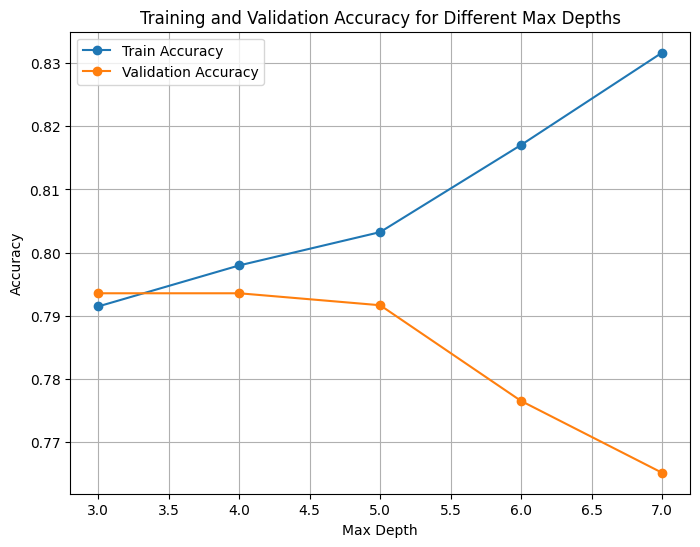

In [70]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# List of 'max_depth' values to try
md_list = [3, 4, 5, 6, 7]  

# Initialize lists to store training and validation metrics
train_md_metric = []
val_md_metric = []

# Loop through different max_depth values
for max_depth in md_list:
    # Train a decision tree model with max_depth
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(train_features, train_labels)
    
    # Predict on training and validation sets
    train_predictions = model.predict(train_features)
    val_predictions = model.predict(val_features)
    
    # Calculate the accuracy on training and validation sets
    train_accuracy = accuracy_score(train_labels, train_predictions)
    val_accuracy = accuracy_score(val_labels, val_predictions)
    
    # Append the metric values to the lists
    train_md_metric.append(train_accuracy)
    val_md_metric.append(val_accuracy)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'max_depth': md_list,
    'train_accuracy': train_md_metric,
    'val_accuracy': val_md_metric
})

# Display the DataFrame
print(results_df)

# Plot the training and validation accuracy for each max_depth
plt.figure(figsize=(8, 6))
plt.plot(md_list, train_md_metric, label='Train Accuracy', marker='o')
plt.plot(md_list, val_md_metric, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Max Depths')
plt.legend()
plt.grid(True)
plt.show()


   min_samples_leaf  train_accuracy  val_accuracy
0                 1        1.000000      0.672348
1                 2        0.958621      0.727273
2                 4        0.915822      0.735795
3                 8        0.870588      0.750000
4                16        0.838134      0.788826


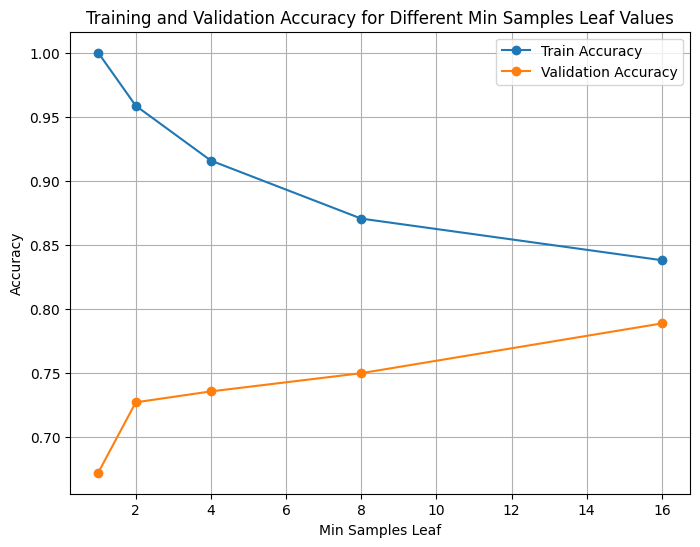

In [72]:
# List of 'min_samples_leaf' values to try (less than 1% of the data length, doubling each time)
msl_list = [1, 2, 4, 8, 16]  # These values correspond to factors of 2 starting from a low number

# Initialize lists to store training and validation metrics
train_msl_metric = []
val_msl_metric = []

# Loop through different min_samples_leaf values
for min_samples_leaf in msl_list:
    # Train a decision tree model with min_samples_leaf
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(train_features, train_labels)
    
    # Predict on training and validation sets
    train_predictions = model.predict(train_features)
    val_predictions = model.predict(val_features)
    
    # Calculate the accuracy on training and validation sets
    train_accuracy = accuracy_score(train_labels, train_predictions)
    val_accuracy = accuracy_score(val_labels, val_predictions)
    
    # Append the metric values to the lists
    train_msl_metric.append(train_accuracy)
    val_msl_metric.append(val_accuracy)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'min_samples_leaf': msl_list,
    'train_accuracy': train_msl_metric,
    'val_accuracy': val_msl_metric
})

# Display the DataFrame
print(results_df)

# Plot the training and validation accuracy for each min_samples_leaf
plt.figure(figsize=(8, 6))
plt.plot(msl_list, train_msl_metric, label='Train Accuracy', marker='o')
plt.plot(msl_list, val_msl_metric, label='Validation Accuracy', marker='o')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Min Samples Leaf Values')
plt.legend()
plt.grid(True)
plt.show()


   min_impurity_decrease  train_accuracy  val_accuracy
0                0.10000        0.734686      0.734848
1                0.01000        0.791481      0.793561
2                0.00100        0.801420      0.792614
3                0.00010        0.984178      0.698864
4                0.00001        0.999594      0.669508


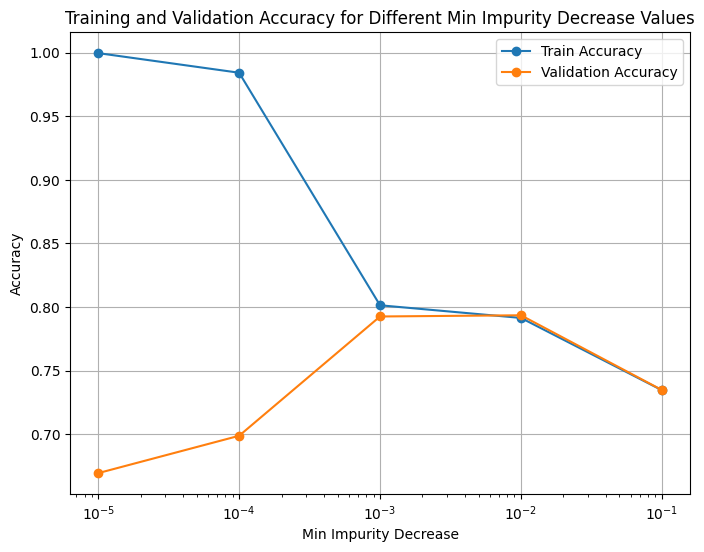

In [73]:
# List of 'min_impurity_decrease' values to try (starting at 0.1 and decreasing by a factor of 10)
mid_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# Initialize lists to store training and validation metrics
train_mid_metric = []
val_mid_metric = []

# Loop through different min_impurity_decrease values
for min_impurity_decrease in mid_list:
    # Train a decision tree model with min_impurity_decrease
    model = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease, random_state=42)
    model.fit(train_features, train_labels)
    
    # Predict on training and validation sets
    train_predictions = model.predict(train_features)
    val_predictions = model.predict(val_features)
    
    # Calculate the accuracy on training and validation sets
    train_accuracy = accuracy_score(train_labels, train_predictions)
    val_accuracy = accuracy_score(val_labels, val_predictions)
    
    # Append the metric values to the lists
    train_mid_metric.append(train_accuracy)
    val_mid_metric.append(val_accuracy)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'min_impurity_decrease': mid_list,
    'train_accuracy': train_mid_metric,
    'val_accuracy': val_mid_metric
})

# Display the DataFrame
print(results_df)

# Plot the training and validation accuracy for each min_impurity_decrease
plt.figure(figsize=(8, 6))
plt.plot(mid_list, train_mid_metric, label='Train Accuracy', marker='o')
plt.plot(mid_list, val_mid_metric, label='Validation Accuracy', marker='o')
plt.xscale('log')  # Use logarithmic scale since the values decrease exponentially
plt.xlabel('Min Impurity Decrease')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Min Impurity Decrease Values')
plt.legend()
plt.grid(True)
plt.show()

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3622
           1       0.70      0.37      0.49      1308

    accuracy                           0.79      4930
   macro avg       0.75      0.66      0.68      4930
weighted avg       0.78      0.79      0.77      4930

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       776
           1       0.70      0.39      0.50       280

    accuracy                           0.79      1056
   macro avg       0.76      0.66      0.68      1056
weighted avg       0.78      0.79      0.77      1056

Confusion Matrix (Training):
[[3412  210]
 [ 818  490]]
Confusion Matrix (Validation):
[[730  46]
 [172 108]]


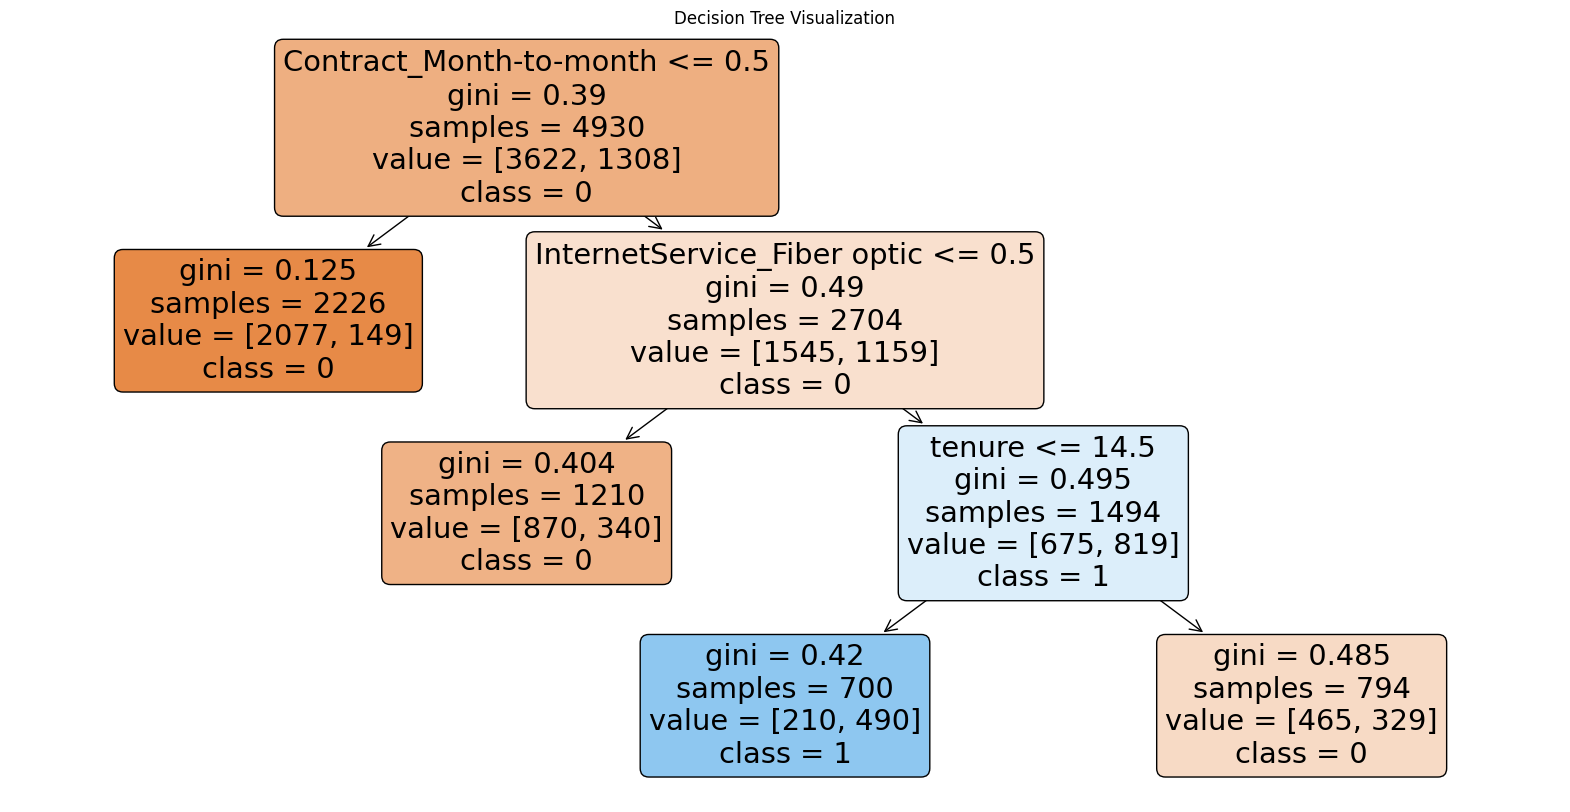

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

optimal_max_depth = 5  
optimal_min_samples_leaf = 4  
optimal_min_impurity_decrease = 0.01  

# Initialize the model with the optimal hyperparameters
model = DecisionTreeClassifier(
    max_depth=optimal_max_depth,
    min_samples_leaf=optimal_min_samples_leaf,
    min_impurity_decrease=optimal_min_impurity_decrease,
    random_state=42
)

# Train the model
model.fit(train_features, train_labels)

# Predictions on training and validation sets
train_predictions = model.predict(train_features)
val_predictions = model.predict(val_features)

# Display classification report for training and validation
print("Classification Report (Training):")
print(classification_report(train_labels, train_predictions))

print("Classification Report (Validation):")
print(classification_report(val_labels, val_predictions))

# Display confusion matrix for training and validation
print("Confusion Matrix (Training):")
train_cm = confusion_matrix(train_labels, train_predictions)
print(train_cm)

print("Confusion Matrix (Validation):")
val_cm = confusion_matrix(val_labels, val_predictions)
print(val_cm)

# Visualize the decision tree
plt.figure(figsize=(20, 10))

class_names = [str(cls) for cls in model.classes_]

#plotting decision tree
plot_tree(model, filled=True, feature_names=train_features.columns, class_names=class_names, rounded=True, proportion=False)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
#The model's performance is generally good
#but might need further tuning or adjustments 
#to handle specific challenges such as overfitting, class imbalance,
#or low precision/recall for certain classes.
#Additional experimentation with hyperparameters
#and addressing the issues mentioned above could lead to
#improvements in model accuracy and generalizability.